## Observations and Insights

## Dependencies and starter code

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata = "../data/Mouse_metadata.csv"
study_results = "../data/Study_results.csv"

# Read the mouse data and the study results
mm = pd.read_csv(mouse_metadata)
sr = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table=pd.merge(mm,sr, on="Mouse ID")
merge_table_df=pd.DataFrame(merge_table)

## Summary statistics

In [88]:
# Generate a summary statistics table of mean, median, 
#variance, standard deviation, and SEM of the tumor volume for each regimen

In [89]:
#group customers by drug regimen
regimen=merge_table.groupby(["Drug Regimen"])


mean=regimen['Tumor Volume (mm3)'].mean()
median=regimen['Tumor Volume (mm3)'].median()
variance =regimen['Tumor Volume (mm3)'].var()
std_dev=regimen['Tumor Volume (mm3)'].std()
SEM=regimen['Tumor Volume (mm3)'].sem()

#set the above into a dictionary
dict1={"Mean Tumor Volume": mean,
                       "Median Tumor Volume": median,
                       "Variance" :variance,
                       "Std Dev": std_dev, "Standard Error" : SEM}

#run dictionary as a df and apply formatting
report_1=pd.DataFrame(dict1)
report_1["Mean Tumor Volume"]=round(report_1["Mean Tumor Volume"],3)
report_1["Median Tumor Volume"]=round(report_1["Median Tumor Volume"],3)
report_1["Variance"]=round(report_1["Variance"],3)
report_1["Std Dev"]=round(report_1["Std Dev"],3)
report_1["Standard Error"]=round(report_1["Standard Error"],3)

report_1                                               
                            

,Mean Tumor Volume,Median Tumor Volume,Variance,Std Dev,Standard Error
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar plots

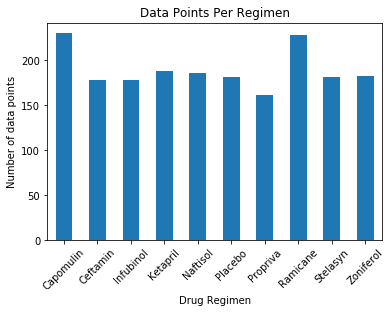

In [249]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_df=pd.DataFrame(regimen.count())
regimen_df=regimen_df.loc[: , "Mouse ID"]
regimen_df.plot(kind='bar')

plt.xticks(rotation=45)
plt.ylabel("Number of data points")
plt.title("Data Points Per Regimen")
plt.show()

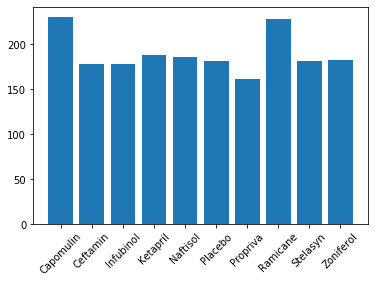

In [250]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis=np.arange(len(regimen_df))
ticks=[i for i in x_axis]

plt.bar(x_axis, regimen_df)
plt.xticks(ticks, regimen_df.index.values, rotation=45)

plt.show()


## Pie plots

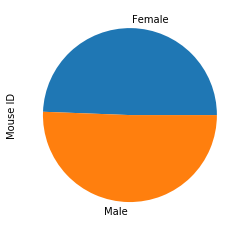

In [251]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender=merge_table.groupby(['Sex'])
gender_df=pd.DataFrame(gender.count())
gender_df=gender_df.loc[: , "Mouse ID"]
gender_df.plot(kind='pie')
plt.show()
#QUESTION: how to set proper y-axis?

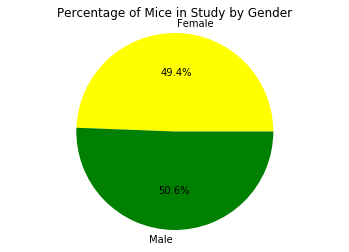

In [276]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#group customers by gender
gender=merge_table.groupby(["Sex"])
gender_df=pd.DataFrame(gender.count())
colors=['yellow', 'green']
plt.pie(gender_df['Mouse ID'], labels=gender_df.index.values, colors=colors, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Percentage of Mice in Study by Gender")
plt.show()

## Quartiles, outliers and boxplots

In [277]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#QUESTION: how to determine most promising regimens?

In [278]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

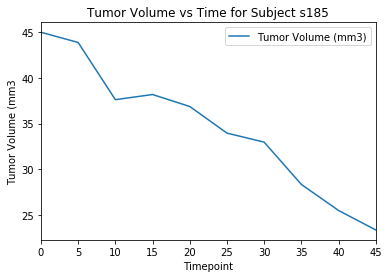

In [285]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

CPM_df=merge_table.loc[merge_table['Drug Regimen']=='Capomulin']
s185_df=CPM_df.loc[CPM_df['Mouse ID']=='s185']

s185_df.plot(kind='line',x='Timepoint', y='Tumor Volume (mm3)')
plt.title("Tumor Volume vs Time for Subject s185")
plt.ylabel("Tumor Volume (mm3")
plt.show()

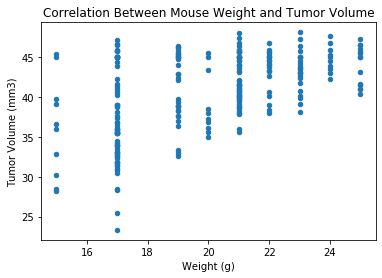

In [288]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

CPM_df.plot(kind='scatter',x='Weight (g)', y='Tumor Volume (mm3)')
plt.title("Correlation Between Mouse Weight and Tumor Volume")
plt.show()

#QUESTION: need to average all tumor volume across all 10 timepoints for each mouse?  or use all timepoints?


Pearson R: 0.53


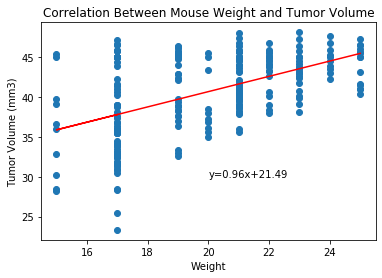

In [297]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

axis_x=CPM_df.loc[:,'Weight (g)']
axis_y=CPM_df.loc[:,'Tumor Volume (mm3)']
correlation=st.pearsonr(axis_x, axis_y)
print(f"Pearson R: {round(correlation[0],2)}")
plt.scatter(axis_x, axis_y)
(slope, intercept, rvalue, pvalue, stderr)=linregress(axis_x,axis_y)
regress_values=axis_x*slope+intercept
plt.plot(axis_x,regress_values, "r-")
line_eq="y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.annotate(line_eq, (20,30))

plt.title("Correlation Between Mouse Weight and Tumor Volume")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.show()